In [7]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 2: Image Enhancement II: Spatial Smoothing

In this task, we will implement average, gaussian, and median spatial filter.

In [8]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-6atvp0uq
  Created wheel for ee604-plugins: filename=ee604_plugins-0.2.1-cp36-none-any.whl size=2311 sha256=cae3ea35b0717933dc6be7ab6ec2ed212e475fc40520e264188a5279eb90081e
  Stored in directory: /tmp/pip-ephem-wheel-cache-pqa6nu97/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-6atvp0uq


In [9]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

from ee604_plugins import download_dataset, cv2_imshow
download_dataset(assignment_no=2, task_no=2) # download data for this assignment

Download Complete!


In [10]:
def avgFilter(img, kernel_size=7):
    '''
    Write a program to implement average filter. You have to assume square kernels.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + kernel_size - size of the kernel window which should be used for averaging.
    
    Ouputs:
    + out_img - smoothed grayscaled image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed modules:
    + Basic numpy operations
    + cv2.filter2D() to perform 2D convolution
    
    Hint:
    + Not needed.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    # Replace with your code...
    kernel = 1/(kernel_size**2)*np.ones((kernel_size, kernel_size))
    out_img = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [11]:
def gaussianFilter(img, kernel_size=7, sigma=3):
    '''
    Write a program to implement gaussian filter. You have to assume square kernels.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + kernel_size - size of the kernel window which should be used for smoothing. 
    + sigma - sigma parameter for gaussian kernel
    
    Ouputs:
    + out_img - smoothed grayscaled image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed modules:
    + Basic numpy operations
    + cv2.filter2D() to perform 2D convolution
    + cv2.getGaussianKernel(). Note that this will give you 1D gaussian.
    
    Hint:
    + Not needed.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    # Replace with your code...
    kernel1d = cv2.getGaussianKernel(ksize=kernel_size, sigma=sigma)
    kernel = kernel1d*kernel1d.T
    out_img = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [12]:
def medianFilter(img, kernel_size=7):
    '''
    Write a program to implement median filter. You have to assume square kernels.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + kernel_size - size of the kernel window which should be used for smoothing.
    
    Ouputs:
    + out_img - smoothed grayscaled image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed modules:
    + Basic numpy operations
    + np.median()
    
    Hint:
    + Not needed.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    # Replace with your code...
    n = img.shape[0]
    start = int((kernel_size - 1)/2)
    end = n - start - 1

    out_img = np.zeros((n, n))
    for i in range(start, end+1):
        for j in range(start, end+1):
            kernel = img[i-start:i+start+1, j-start:j+start+1]
            median = np.median(kernel)

            out_img[i][j] = median
    
    # Handle borders
    for i in range(start-1, -1, -1):
        for j in range(start, end+1):
            out_img[i][j] = out_img[i+1][j]
    
    for j in range(end+1, n):
        for i in range(0, n-start):
            out_img[i][j] = out_img[i][j-1]
    
    for i in range(end+1, n):
        for j in range(start, n):
            out_img[i][j] = out_img[i-1][j]
    
    for i in range(0, n):
        for j in range(start-1, -1, -1):
            out_img[i][j] = out_img[i][j+1]

    #############################
    # End your code here ########
    #############################
    
    return out_img

### Test

---
Your observation should compare the different methods for different images. Must include a sentence on which method + kernel size worked best in each case.

In [13]:
# Do not change codes inside this cell
# Add your observations in next to next cell
# Your observation should compare the different methods for different images

lena_orig = cv2.imread('data/lena_gray.jpg', 0)
lena_noisy_1 = cv2.imread('data/lena_noisy_1.jpg', 0)
lena_noisy_2 = cv2.imread('data/lena_noisy_2.jpg', 0)
lena_noisy_3 = cv2.imread('data/lena_noisy_3.jpg', 0)

def plot_frame(gridx, gridy, subplot_id, img, name):
    plt.subplot(gridx, gridy, 1 + int(subplot_id))
    plt.imshow(np.uint8(img), cmap="gray", vmin=0, vmax=255)
    plt.axis("off")
    plt.title(name)


-------------------------------------
#   Lena Noisy 1 | kernel: 5 x 5
-------------------------------------


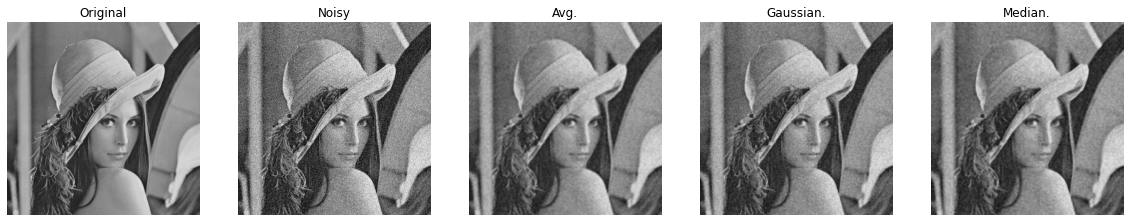


-------------------------------------
#   Lena Noisy 1 | kernel: 7 x 7
-------------------------------------


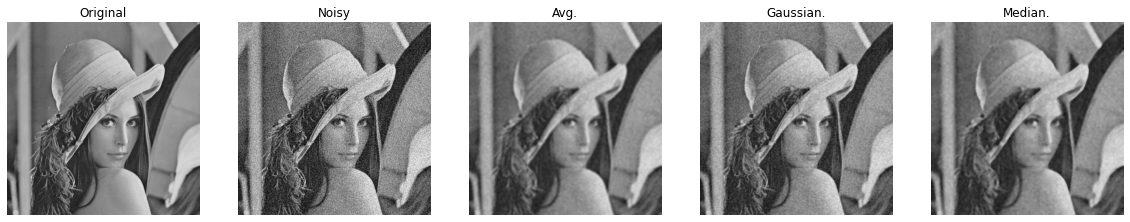


-------------------------------------
#   Lena Noisy 1 | kernel: 9 x 9
-------------------------------------


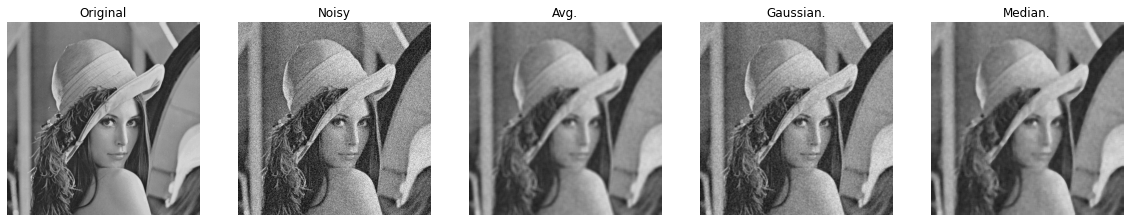


-------------------------------------
#   Lena Noisy 2 | kernel: 5 x 5
-------------------------------------


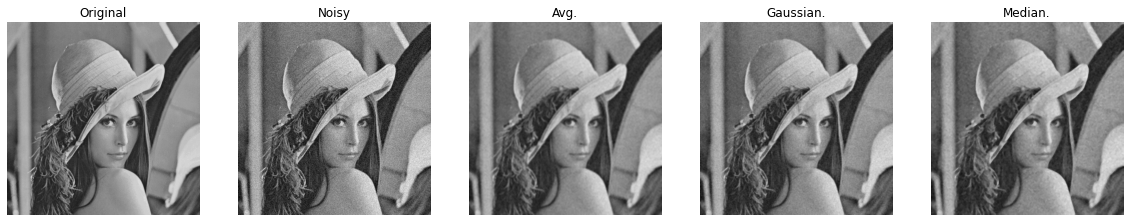


-------------------------------------
#   Lena Noisy 2 | kernel: 7 x 7
-------------------------------------


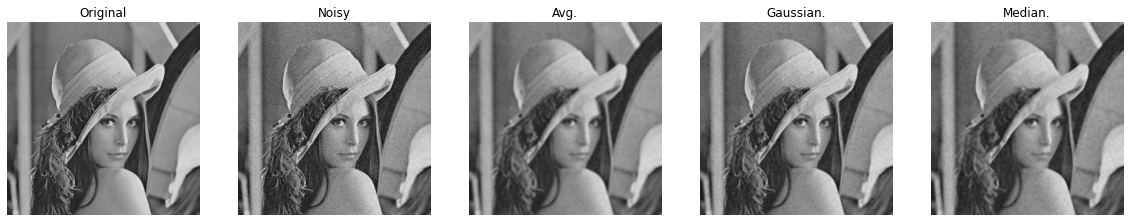


-------------------------------------
#   Lena Noisy 2 | kernel: 9 x 9
-------------------------------------


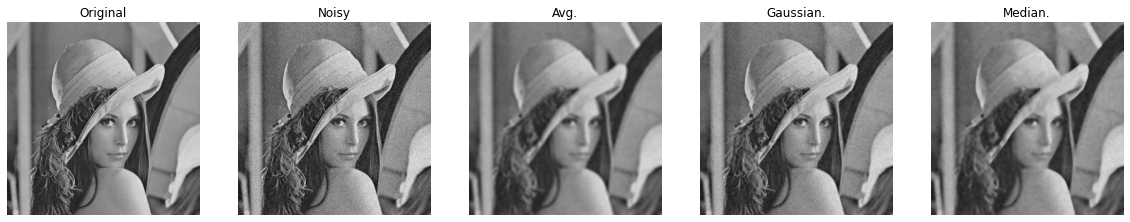


-------------------------------------
#   Lena Noisy 3 | kernel: 5 x 5
-------------------------------------


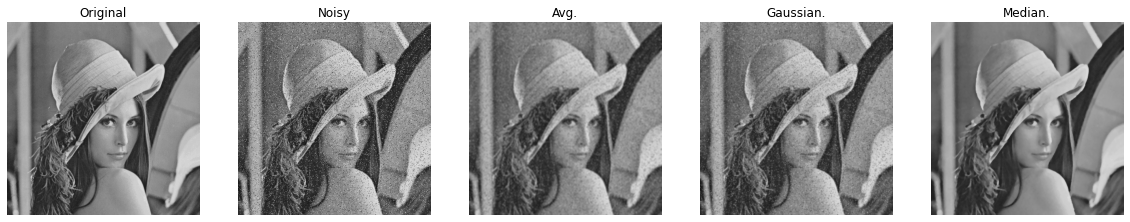


-------------------------------------
#   Lena Noisy 3 | kernel: 7 x 7
-------------------------------------


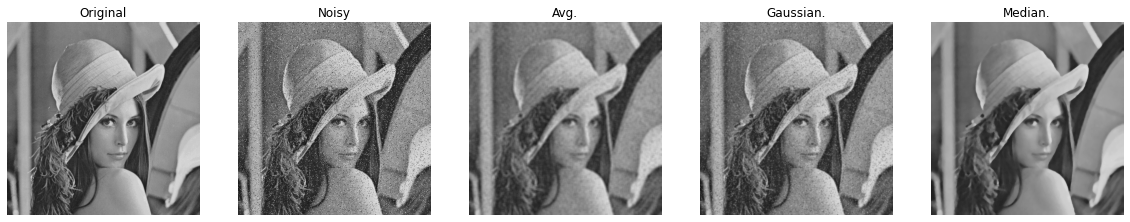


-------------------------------------
#   Lena Noisy 3 | kernel: 9 x 9
-------------------------------------


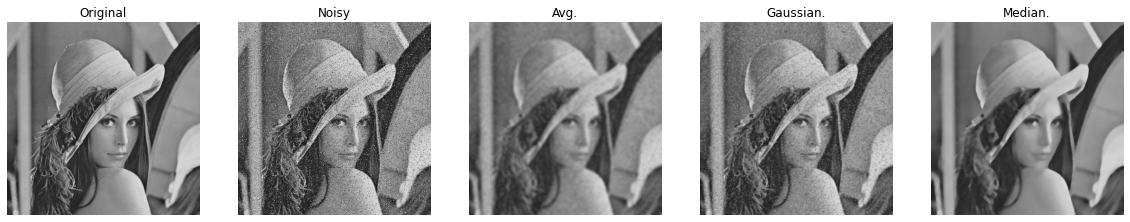

In [14]:
# Do not change codes inside this cell
# Add your observations in next cell

img_arr = [lena_noisy_1, lena_noisy_2, lena_noisy_3]
img_caption = ["Noisy 1", "Noisy 2", "Noisy 3"]

for i in range(3):
    for kernel_size in [5, 7, 9]:
        print("\n-------------------------------------")
        print("#   Lena", img_caption[i], "| kernel:", kernel_size, "x", kernel_size)
        print("-------------------------------------")

        plt.figure(figsize=(20, 13))
        plot_frame(1, 5, 0, lena_orig, "Original")
        plot_frame(1, 5, 1, img_arr[i], "Noisy")

        tmp_img = avgFilter(np.copy(img_arr[i]), kernel_size=kernel_size)
        plot_frame(1, 5, 2, tmp_img, "Avg.")

        tmp_img = gaussianFilter(np.copy(img_arr[i]), kernel_size=kernel_size, sigma=int(kernel_size/5))
        plot_frame(1, 5, 3, tmp_img, "Gaussian.")

        tmp_img = medianFilter(np.copy(img_arr[i]), kernel_size=kernel_size)
        plot_frame(1, 5, 4, tmp_img, "Median.")

        plt.show()

In [15]:
your_observation = """
Lena Noisy 1: 

As the kernel size goes up the blurring of the image increases.
The average filter performs better than the gaussian/median filter here
Best: Avg. filter with kernel 5x5

Lena Noisy 2:
The average filter blurs the image more. The median filter doesn't filter out much noise here.
The gaussian filter does better here.
Best: Gaussian filter with kernel 7x7 

Lena Noisy 3:
Here the average filter and gaussian filter are unable to filter out the noise.
The median filter does well although it blurs the image as kernel size goes up.
Best: Median filter with kernel 5x5
"""

print(your_observation)


Lena Noisy 1: 

As the kernel size goes up the blurring of the image increases.
The average filter performs better than the gaussian/median filter here
Best: Avg. filter with kernel 5x5

Lena Noisy 2:
The average filter blurs the image more. The median filter doesn't filter out much noise here.
The gaussian filter does better here.
Best: Gaussian filter with kernel 7x7 

Lena Noisy 3:
Here the average filter and gaussian filter are unable to filter out the noise.
The median filter does well although it blurs the image as kernel size goes up.
Best: Median filter with kernel 5x5



In [ ]:
# Submission >>>>>>>>>>>>>>>>>>>>>
# Do not change codes inside this cell.

gen_imgs = []
img_arr = [lena_noisy_1, lena_noisy_2, lena_noisy_3]

for i in range(3):
    for kernel_size in [5, 7, 9]:
        tmp_img = avgFilter(np.copy(img_arr[i]), kernel_size=kernel_size)
        gen_imgs.append(tmp_img)
        
        tmp_img = gaussianFilter(np.copy(img_arr[i]), kernel_size=kernel_size, sigma=int(kernel_size/5))
        gen_imgs.append(tmp_img)
        
        tmp_img = medianFilter(np.copy(img_arr[i]), kernel_size=kernel_size)
        gen_imgs.append(tmp_img)

task2_submission = np.array(gen_imgs)